# Quatum states of Carbon Monoxide and Fortrat Diagram

We here see the quantum states of Carbon Monoxide. Also, to see how the band head appears, we would like to plot the Fortrat diagram with a given quantum number and interval. 
To do so, we use optional_quantum_states=True option in api.MdbExomol.  

In [1]:
from exojax.spec import api
emf='CO/12C-16O/Li2015'   
mdb = api.MdbExomol(emf, None, optional_quantum_states=True)

HITRAN exact name= (12C)(16O)
Background atmosphere:  H2


/home/kawahara/exojax/src/exojax/spec/api.py:154: UserWarning: nurange=None. Nonactive mode.
  warnings.warn("nurange=None. Nonactive mode.", UserWarning)


Reading CO/12C-16O/Li2015/12C-16O__Li2015.trans.bz2
DataFrame (self.df) available.


Check DataFrame. We see Li2015 contains the vibrational states for lower and upper states, v_l, v_u.

In [13]:
mdb.df[0:2]

#,i_upper,i_lower,A,nu_lines,gup,jlower,jupper,elower,v_l,v_u,kp_l,kp_u,Sij0
0,84,42,1.155e-06,2.40559,3,0,1,66960.7,41,41,e,e,3.81197e-164
1,83,41,1.161e-06,2.44177,3,0,1,65819.9,40,40,e,e,9.66303e-162


The Rovib transition changes both rotational and vibrational quantum states. We here investigate the vibrational quantum state $\nu$. Let's check how many $\Delta \nu$ Li2015 database contains:

In [5]:
import numpy as np
dv = mdb.df["v_u"]-mdb.df["v_l"]
np.unique(dv.values)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

So, we have 12 different $\Delta \nu$. Let's plot them.

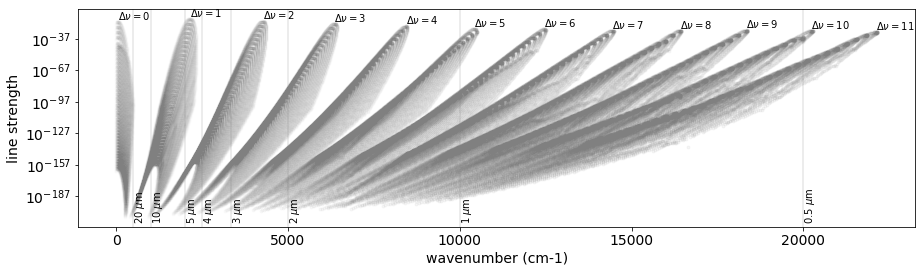

In [71]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15, 4))
ax = fig.add_subplot(111)
for i, udv in enumerate(np.unique(dv.values)):
    mask = dv == udv
    mdf = mdb.df[mask]
    ax.plot(mdf["nu_lines"].values,
             mdf["Sij0"].values,
             ".",
             alpha=0.01 + 0.005 * i,
             color="gray")
    ax.text(
        np.sum(mdf["nu_lines"].values * mdf["Sij0"].values) /
        np.sum(mdf["Sij0"].values), 1.e2*np.max(mdf["Sij0"].values),"$\\Delta \\nu=$"+str(udv))

for mic in [0.5,1,2,3,4,5,10,20]:
    x = 1.e4/mic
    plt.axvline(x,alpha=0.2,color="gray")
    plt.text(x,1.e-210,str(mic)+" $\\mu$m",rotation="90")
plt.yscale("log")
#plt.xscale("log")
plt.tick_params(labelsize=14)
plt.xlabel("wavenumber (cm-1)",fontsize=14)
plt.ylabel("line strength",fontsize=14)
plt.savefig("co_dnu.png", bbox_inches="tight", pad_inches=0.1)
plt.show()

Using DataFrame, we pick up the lines with $\Delta \nu = 2$, $\Delta J = \pm 1$ (R, P-branch), and $\nu = 0$ here.

In [2]:
dv = mdb.df["v_u"]-mdb.df["v_l"]
dJ = mdb.df["jupper"] - mdb.df["jlower"]
vmask = mdb.df["v_l"] == 0
mask_R = (dv == 2) * (dJ == 1) * vmask
mask_P = (dv == 2) * (dJ == -1) * vmask

df_R = mdb.df[mask_R]
df_P = mdb.df[mask_P]


Let's plot the Fortrat diagram. The y-axis of the Fortart diagram is $J_\mathrm{upper}$ for R-branch and $- J_\mathrm{lower}$ for P-branch.

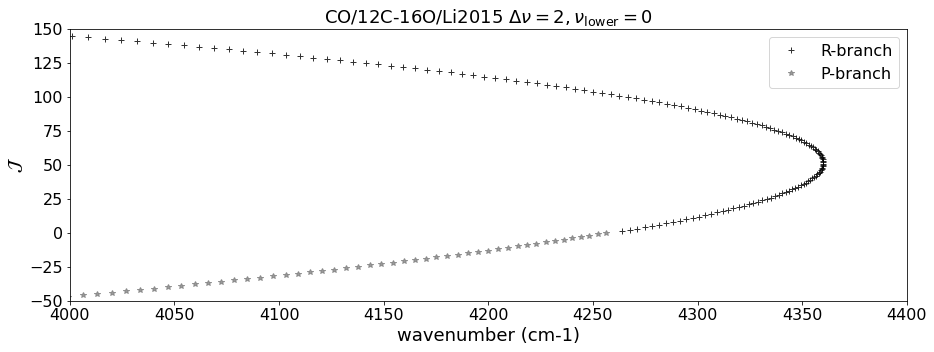

In [3]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15,5))
plt.plot(df_R["nu_lines"].values,df_R["jupper"].values,"+",alpha=0.8, color="black",label="R-branch")
plt.plot(df_P["nu_lines"].values,- df_P["jupper"].values,"*",alpha=0.8, color="gray",label="P-branch")
plt.tick_params(labelsize=16)
plt.xlabel("wavenumber (cm-1)", fontsize=18)
plt.ylabel("$\\mathcal{J}$", fontsize=18)
plt.legend(fontsize=16)
plt.title(emf+" $\\Delta \\nu = 2, \\nu_\\mathrm{lower} = 0$",fontsize=18)
plt.xlim(4000.,4400)
plt.ylim(-50,150)
plt.savefig("fortrat.png",  bbox_inches="tight", pad_inches=0.1)
plt.show()